In [ ]:
import sys
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
sys.path.append('/content/drive/MyDrive/finance_course/2022/lesson8')

Mounted at /content/drive


## Portfolio Optimization

* Portfolio optimization models look for the optimal way to make investments. 
  * Usually investors expect either a maximum return for a given level of risk or a given return for a minimum risk so these models are typically based on two criteria: **maximization of the expected return and/or minimization of the risk**.

### Some Notation

* expected return: 
$$\mathbb{E}(R_{p}) = \sum _{i}w_{i} \mathbb{E}(R_{i}) = \mathbf{w}\cdot \mathbf{R} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\mathbb{E}(R_1) & \mathbb{E}(R_2) & \cdots & \mathbb{E}(R_n)
\end{bmatrix}$$
(with $\sum_{i}w_i = 1$ and $0 \le w_i \le 1$);


In [ ]:
import numpy as np

w = np.array([0.1, 0.2, 0.5, 0.05, 0.1])
R = np.array([0.239188, 0.415127, 0.263797, 0.172818, 0.528046])

ret = R.dot(w)
print (ret)

ret = np.dot(R, w)
print (ret)

0.3002882
0.3002882


* portfolio return variance:
  $$ \sigma _{p}^{2} = \sum _{i}\sum _{j}w_{i}w_{j}\sigma _{ij} = \mathbf{w}^T\Sigma\mathbf{w} =
\begin{bmatrix}
w_1 \\ 
w_2 \\ 
\vdots \\
w_n
\end{bmatrix}
\begin{bmatrix}
\sigma_{11} & \sigma_{12} & \cdots & \sigma_{1n} \\
\sigma_{21} & \sigma_{22} & \cdots & \sigma_{2n} \\
\vdots & & \\
\sigma_{n1} & \sigma_{n2} & \cdots & \sigma_{nn} \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix} = 
\begin{bmatrix}
\sigma_{11} *w_1 + \sigma_{12} *w_2 + \cdots + \sigma_{1n}*w_n \\
\sigma_{21} *w_1 + \sigma_{22} *w_2  +\cdots + \sigma_{2n}*w_n \\
\vdots \\
\sigma_{n1} *w_1 + \sigma_{n2}*w_2 + \cdots + \sigma_{nn}*w_n \\
\end{bmatrix}
\begin{bmatrix}
w_1 & w_2 & \cdots & w_n
\end{bmatrix}\\[20 pt]
$$ 
  where
  $\Sigma = \sigma _{ij}=\sigma _{i}\sigma _{j}\rho _{ij}$ is the 
  covariance, $\rho_{ij}$ is the correlation coefficient;
* portfolio standard deviation:
  $$ \sigma _{p}= \sqrt{\sigma _{p}^{2}}$$

In [ ]:
import numpy as np

w = np.array([0.1, 0.2, 0.5, 0.05, 0.1])
Sigma = np.array([[0.051902, 0.025037, 0.025737, 0.022454, 0.027760],
                  [0.025037, 0.085839, 0.041025, 0.039501, 0.048412],
                  [0.025737, 0.041025, 0.069550, 0.036127, 0.044528],
                  [0.022454, 0.039501, 0.036127, 0.051797, 0.040390],
                  [0.027760, 0.048412, 0.044528, 0.040390, 0.178298]])

var = w.T.dot(Sigma.dot(w))
print (var)

var = np.dot(w.T, np.dot(Sigma, w))
print (var)

print (np.sqrt(var))

0.04520202250000001
0.04520202250000001
0.21260767272137665



* Throughout this lesson we will use market data stored in [portfolio_data.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv).


In [54]:
# load the file
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/portfolio_data.csv", index_col="date")
print (df.head())

                 AAPL     AMZN     FB    GOOG       NFLX
date                                                    
2014-03-27  71.865678  338.470  60.97  558.46  52.025714
2014-03-28  71.785450  338.290  60.01  559.99  51.267143
2014-03-31  71.769404  336.365  60.24  556.97  50.290000
2014-04-01  72.425937  342.990  62.62  567.16  52.098571
2014-04-02  72.546280  341.960  62.72  567.00  51.840000


In [47]:
import matplotlib.pyplot as plt
plt.style.use('https://raw.githubusercontent.com/matteosan1/finance_course/develop/course.mplstyle')

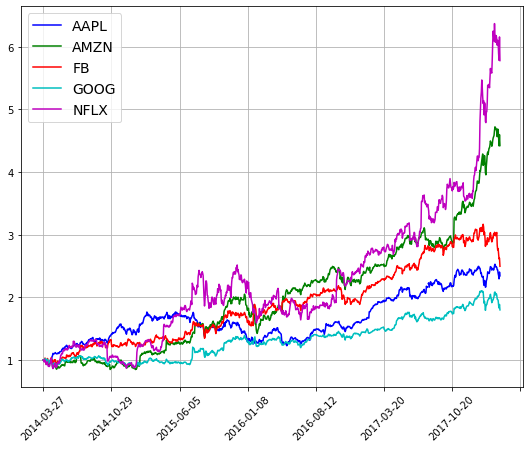

In [33]:
df_plot = df.copy()
df_plot = df_plot/df_plot.iloc[0]

for l in df_plot.columns:
  plt.plot(df_plot[l], label=l)

plt.gca().xaxis.set_major_locator(plt.MaxNLocator(10))
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

In [55]:
# returns daily and annualized

daily_returns = df.pct_change()
returns = daily_returns.mean()*252
print (returns)

AAPL    0.239188
AMZN    0.415127
FB      0.263797
GOOG    0.172818
NFLX    0.528046
dtype: float64


In [56]:
# covariance
covariance = daily_returns.cov()*252
print (covariance)

          AAPL      AMZN        FB      GOOG      NFLX
AAPL  0.051902  0.025037  0.025737  0.022454  0.027760
AMZN  0.025037  0.085839  0.041025  0.039501  0.048412
FB    0.025737  0.041025  0.069550  0.036127  0.044528
GOOG  0.022454  0.039501  0.036127  0.051797  0.040390
NFLX  0.027760  0.048412  0.044528  0.040390  0.178298


### Modern Portfolio Theory (MPT)
* **Every portfolio is characterized by the asset weights**, so any theory concerning portfolio management provides an "optimal" way to determine weights.
* MPT model assumes an investor usually consider **expected return and variance in return**. Markowitz intuition was to estimate investment risk through portfolio variance  (i.e. since it measures the variability in realized return around the expected return). 
  * The latter characterizes not only the individual variability of the return on each investment, but also how each investment’s return tends to move with other investments. 

#### Efficient Portfolios
* There is no precise way for an investor to determine the “correct” trade off between risk and return 
  * generally higher expected return has to be paid with higher risk.

* Portfolio weights $w_i$ should be chosen such that it yields the highest return for a certain level of risk (or equivalently the lowest risk for a certain level of return)

$$\min\{\sigma_P^2\}= \underset{\mathbf{w}}{\min}\{\mathbf{w}^T\Sigma\mathbf{w}\}\quad\textrm{subjected to }\mathbf{w}\cdot\mathbf{R} = R_{target}$$

* The **efficient frontier** consists of the set of all efficient portfolios that have the lowest level of risk for each expected return.

In [6]:
# markowitz
import numpy as np
from scipy.optimize import minimize

def sum_weights(w): 
    return np.sum(w) - 1

def min_risk(w, cov):
    return w.T.dot(cov.dot(w))

def target_return(w, returns, target_return): 
    return (returns.dot(w) - target_return)

num_assets = 5
constraints = [{'type': 'eq', 'fun': sum_weights},
               #{'type': 'eq', 'fun': target_return, 'args':(returns, 0.25)}
               ] 
bounds = tuple((0, 1) for _ in range(num_assets))
weights = [1./num_assets for _ in range(num_assets)]

opts = minimize(min_risk, weights, args=(covariance,),
                bounds=bounds, constraints=constraints)
print (opts)

     fun: 0.0360702996376482
     jac: array([0.0723022 , 0.07233166, 0.0718961 , 0.0719931 , 0.07223676])
 message: 'Optimization terminated successfully'
    nfev: 54
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([0.44544148, 0.06252824, 0.12333118, 0.36621569, 0.00248342])


In [7]:
# expected return
print ("Expected portfolio return: {:.3f}".format(opts.x.dot(returns)))

Expected portfolio return: 0.230


In [ ]:
def sum_weights(dx, x0): 
  x = x0 + dx[:len(x0)] - dx[len(x0):]
  return np.sum(x) - 1

def min_risk(dx, x0, cov):
  x = x0 + dx[:len(x0)] - dx[len(x0):]
  return x.T.dot(cov.dot(x))

def target_return(dx, x0, returns, target_return): 
  x = x0 + dx[:len(x0)] - dx[len(x0):]
  return (returns.dot(x) - target_return)

def transactions(dx, x0, cost):
  #s = np.sum(np.power(dx[:len(x0)] - dx[len(x0):], 2))
  s = np.sum(np.sqrt(np.power(dx[:len(x0)] - dx[len(x0):], 2)))
  return cost-s

num_assets = 5
cost = 0.2
dx = np.array([0. for _ in range(2*num_assets)])
x0 = opts.x#np.array([0.5 for _ in range(num_assets)])
bounds = [(0, 0.5) for _ in range(len(dx))]
constraints = [{'type': 'eq', 'fun': sum_weights, 'args':(x0,)},
               {'type': 'ineq', 'fun': target_return, 'args':(x0, returns, 0.24)},
               {'type': 'ineq', 'fun': transactions, 'args':(x0, cost) }] 
r = minimize(min_risk, dx, args=(x0, covariance), bounds=bounds, constraints=constraints)

print (r)


     fun: 0.03615193357984119
     jac: array([ 0.07210928,  0.07514089,  0.07253889,  0.07152803,  0.07653897,
       -0.07210928, -0.07514089, -0.07253888, -0.07152803, -0.07653897])
 message: 'Optimization terminated successfully'
    nfev: 55
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.0026358 , 0.02551249, 0.00449463, 0.        , 0.02234224,
       0.01055123, 0.00025056, 0.00441008, 0.03083225, 0.00894104])


In [ ]:
print (transactions(r.x, x0, cost))
print (x0 + r.x[:len(x0)] - r.x[len(x0):])
print (target_return(r.x, x0, returns, 0))

0.12250463532623582
[0.43752604 0.08779016 0.12341573 0.33538345 0.01588462]
0.2399999999930937




---



In [8]:
mu = returns
Sigma = covariance

In [9]:
import random
import numpy as np
import cvxpy as cvx

random.seed(1)
N = 10

target_expo = [random.random()*2 - 1 for _ in range(3)]
expos = np.array([[random.random()*2 - 1 for _ in range(3)] for _ in range(10)])

w = cvx.Variable(N)
#w0 = Parameter(value = [0.5 for _ in range(n)], shape=(n))
#wp = Variable(n)
#wm = Variable(n)
#dw = wp - wm
#x = w0 + wp - wm
#ret = sum(multiply(mu.T, x))
#gamma = Parameter(value=0.5, nonneg=True)
#epsilon = Parameter(value=0.02, nonneg=True)

delta = cvx.norm(w@expos - target_expo) #cvx.sum(cvx.power((w@expos - target_expo), 2))
prob = cvx.Problem(cvx.Minimize(delta), [sum(w) == 1,
                                         w >= 0])
#                                           wp <= 1,
#                                           wp >= 0, 
#                                           wm <= 1,
#                                           wm >= 0,
#                                           sum(power(dw, 2)) <= power(gamma, 2),
#           ])

prob.solve()
print (w.value)

[ 3.91933863e-11 -2.71356075e-12  7.87656751e-01 -5.58046883e-13
  2.12343249e-01 -9.84798405e-12  3.46775360e-11 -8.22448132e-12
  5.06700088e-11 -6.02226294e-12]


In [30]:
delta_target = 0.1*np.array([random.random()*2 - 1 for _ in range(3)])
new_target_expo = target_expo + delta_target

print (target_expo)
print (new_target_expo)

[-0.7312715117751976, 0.6948674738744653, 0.5275492379532281]
[-0.66375592  0.70615834  0.55600811]


In [31]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning)

w0 = cvx.Parameter(value=w.value, shape=(N,))
wp = cvx.Variable(N)
wm = cvx.Variable(N)
dw = wp - wm
x = w0 + wp - wm

epsilon = cvx.Parameter(value=0.2, nonneg=True)

delta_new = cvx.norm(x@expos - new_target_expo) 
prob_new = cvx.Problem(cvx.Minimize(delta_new), [sum(x) == 1,
                                                 x >= 0,
                                                 wp <= 1,
                                                 wp >= 0, 
                                                 wm <= 1,
                                                 wm >= 0,
                                                 sum(cvx.power(dw, 2)) <= cvx.power(epsilon, 2)
                                             ])

prob_new.solve()
print (x.value)
print (np.sqrt(sum(cvx.power(dw, 2)).value))
print(prob_new.status)

[ 9.44688772e-13 -3.06976666e-13  7.63125679e-01 -7.71160913e-13
  2.36874321e-01 -1.05526698e-12  2.13739026e-11 -8.18012325e-13
  1.04616316e-12 -7.63944463e-13]
0.034692175299194924
optimal




---



In [ ]:
from cvxpy import *

n = 5
w0 = Parameter(value = [0.5 for _ in range(n)], shape=(n))
wp = Variable(n)
wm = Variable(n)
dw = wp - wm
x = w0 + wp - wm
ret = sum(multiply(mu.T, x))
gamma = Parameter(value=0.5, nonneg=True)
epsilon = Parameter(value=0.02, nonneg=True)
risk = quad_form(x, Sigma)
prob = Problem(Minimize(risk), [sum(x) == 1, 
                                          wp <= 1,
                                          wp >= 0, 
                                          wm <= 1,
                                          wm >= 0,
                                          sum(power(dw, 2)) <= power(gamma, 2),
                                          #ret == 0.25]
          ])

prob.solve()
print (prob.solver_stats.solver_name)
print (prob.status)
if prob.status == 'optimal':
  print (wp.value)
  print (wm.value)
  print (mu.T.dot(x.value))

ECOS
infeasible


/usr/local/lib/python3.8/dist-packages/cvxpy/reductions/solvers/solving_chain.py:178: UserWarning: You are solving a parameterized problem that is not DPP. Because the problem is not DPP, subsequent solves will not be faster than the first one. For more information, see the documentation on Discplined Parametrized Programming, at
	https://www.cvxpy.org/tutorial/advanced/index.html#disciplined-parametrized-programming
  warnings.warn(dpp_error_msg)


In [ ]:
dw = wp - wm
print (dw.value)
y = power(dw, 2)
print (np.sum(y.value))
epsilon = Parameter(value=0.2, nonneg=True)
print (epsilon.value**2)

[-0.06156341 -0.39108812 -0.37412526 -0.20205123 -0.47117198]
0.5595374181349722
0.04000000000000001


In [ ]:
def transactions(dx, x0, cost):
  #s = np.sum(np.power(dx[:len(x0)] - dx[len(x0):], 2))
  s = np.sum(np.sqrt(np.power(dx[:len(x0)] - dx[len(x0):], 2)))
  return cost-s

num_assets = 5
cost = 0.2
dx = np.array([0. for _ in range(2*num_assets)])
x0 = opts.x#np.array([0.5 for _ in range(num_assets)])
bounds = [(0, 0.5) for _ in range(len(dx))]
constraints = [{'type': 'eq', 'fun': sum_weights, 'args':(x0,)},
               {'type': 'ineq', 'fun': target_return, 'args':(x0, returns, 0.24)},
               {'type': 'ineq', 'fun': transactions, 'args':(x0, cost) }] 
r = minimize(min_risk, dx, args=(x0, covariance), bounds=bounds, constraints=constraints)

print (r)




---



In [ ]:
# Compute trade-off curve.
import numpy as np

SAMPLES = 100
risk_data = np.zeros(SAMPLES)
ret_data = np.zeros(SAMPLES)
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
for i in range(SAMPLES):
    gamma.value = gamma_vals[i]
    prob.solve()
    risk_data[i] = sqrt(risk).value
    ret_data[i] = ret.value

print (risk_data)

[0.42225378 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378
 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378
 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378
 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378
 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378 0.42225378
 0.42225378 0.42225378 0.42225378 0.40730569 0.38411843 0.36469733
 0.34853868 0.33518039 0.32420348 0.3152331  0.30793869 0.30203289
 0.29726933 0.29343937 0.29036831 0.28791128 0.27778094 0.2647339
 0.25391864 0.24500888 0.23771098 0.23120229 0.22508881 0.22012343
 0.21610744 0.21287102 0.21027084 0.20670708 0.20333722 0.20062647
 0.19845195 0.19671161 0.19532141 0.19421263 0.19332942 0.19262662
 0.19206783 0.19162385 0.19127126 0.19099138 0.19076929 0.19059311
 0.19045337 0.19034255 0.19025469 0.19018503 0.1901298  0.19008603
 0.19005133 0.19002383 0.19000203 0.18998476 0.18997107 0.18996021
 0.18995161 0.1899448  0.1899394  0.18993512 0.18993172 0.18992

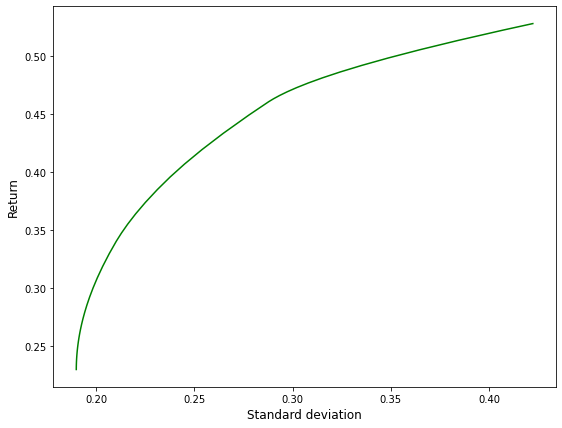

In [ ]:

import matplotlib.pyplot as plt

#markers_on = [29, 40]
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(risk_data, ret_data, 'g-')
# for marker in markers_on:
#     plt.plot(risk_data[marker], ret_data[marker], 'bs')
#     ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
# for i in range(n):
#    plt.plot(sqrt(Sigma[i,i]).value, mu[i], 'ro')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.show()

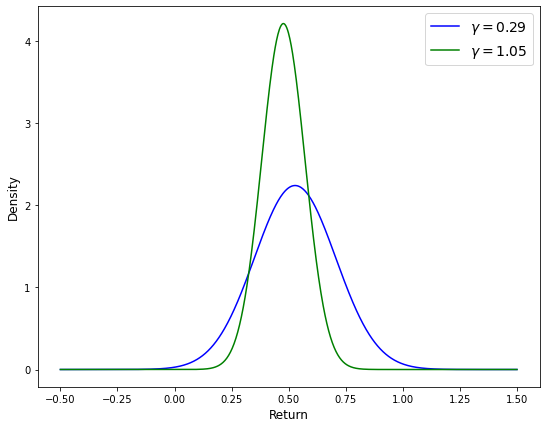

In [ ]:
# Plot return distributions for two points on the trade-off curve.
from scipy.stats import norm #import matplotlib.mlab as mlab

plt.figure()
for midx, idx in enumerate([29, 40]):
    gamma.value = gamma_vals[idx]
    prob.solve()
    x = np.linspace(-0.5, 1.5, 1000)
    plt.plot(x, norm.pdf(x, ret.value, risk.value), label=r"$\gamma = %.2f$" % gamma.value)

plt.xlabel('Return')
plt.ylabel('Density')
plt.legend(loc='upper right')
plt.show()

In [ ]:
from cvxpy import *

Lmax = Parameter()
prob = Problem(Maximize(ret-gamma*risk), [sum(w)==1, 
                                          norm(w, 1) <= Lmax])

L_vals = [1, 2, 4]
SAMPLES = 100
risk_data = np.zeros((len(L_vals), SAMPLES))
ret_data = np.zeros((len(L_vals), SAMPLES))
gamma_vals = np.logspace(-2, 3, num=SAMPLES)
w_vals = []
for k, L_val in enumerate(L_vals):
    for i in range(SAMPLES):
        Lmax.value = L_val
        gamma.value = gamma_vals[i]
        prob.solve()
        risk_data[k, i] = sqrt(risk).value
        ret_data[k, i] = ret.value


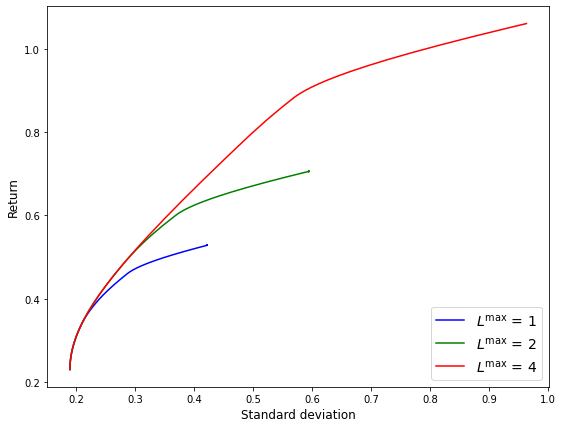

In [ ]:

for idx, L_val in enumerate(L_vals):
    plt.plot(risk_data[idx,:], ret_data[idx,:], label=r"$L^{\max}$ = %d" % L_val)
for w_val in w_vals:
    w.value = w_val
    plt.plot(sqrt(risk).value, ret.value, 'bs')
plt.xlabel('Standard deviation')
plt.ylabel('Return')
plt.legend(loc='lower right')
plt.show()

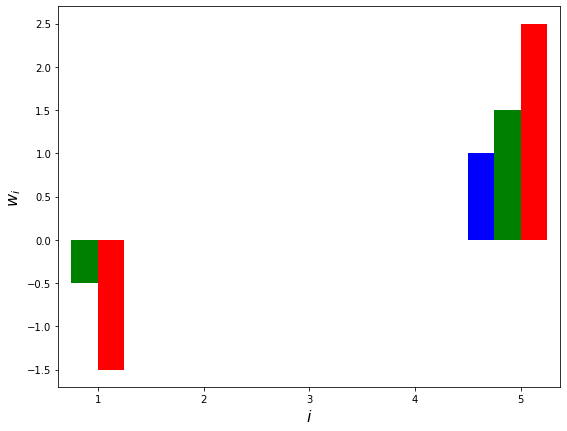

In [ ]:
prob = Problem(Maximize(ret), 
              [sum(w) == 1, 
               norm(w, 1) <= Lmax,
               risk <= 2])

for k, L_val in enumerate(L_vals):
    Lmax.value = L_val
    prob.solve()
    w_vals.append(w.value)

colors = ['b', 'g', 'r']
indices = np.argsort(np.array(mu))
for idx, L_val in enumerate(L_vals):
     plt.bar(np.arange(1,n+1) + 0.25*idx - 0.375, w_vals[idx][indices], color=colors[idx], 
             label=r"$L^{\max}$ = %d" % L_val, width = 0.25)
plt.ylabel(r"$w_i$", fontsize=16)
plt.xlabel(r"$i$", fontsize=16)
plt.xlim([1-0.375, 5+.375])
plt.xticks(np.arange(1,n+1))
plt.show()



---



* The model recommends about 44% of the portfolio be invested in AAPL, about 10% in AMZN, 12% in FB and so on...
* The expected return is about 25% as required in the constraint, with a variance of about 0.036 (standard deviation of 0.19).

* We based the model simply on statistical data derived from daily returns. However it could be possible to use also information about its expected future performance.

* Draw the efficient frontier of return and risk.

In [112]:
# efficient frontier

num_assets = 5
results = []    
for target in np.arange(0.20, 0.5, 0.005):
    constraints = ({'type': 'eq', 'fun': sum_weights},
                   {'type': 'eq', 'fun': target_return, 'args':(returns, target)})
    weights = [1./num_assets for _ in range(num_assets)]
    opts = minimize(min_risk, weights, args=(covariance,), bounds=bounds, constraints=constraints) 
    
    results.append((np.sqrt(opts.x.T.dot(covariance.dot(opts.x))),
                    returns.dot(opts.x))) 

In [104]:
import numpy as np

np.random.seed(1)

res = []
w = np.random.uniform(size=50000)
w = w.reshape(5, 10000)

row_sums = w.sum(axis=0)
print (row_sums[0])
print(w[:, 0])
new_matrix = w.T / row_sums[:, np.newaxis]
print (new_matrix[0, :])
for i in range(10000):
  res.append((new_matrix[i, :].dot(returns), np.sqrt(new_matrix[i, :].T.dot(covariance.dot(new_matrix[i, :])))))

res = np.array(res)

3.2263872469795487
[0.417022   0.76549696 0.80580204 0.3593405  0.87872575]
[0.12925355 0.23726134 0.24975366 0.1113755  0.27235595]


In [105]:
print (res[0])
print (new_matrix[:, 0])

[0.3583581  0.23114591]
[1.29253550e-01 2.81700818e-01 3.65228696e-05 ... 3.04795257e-02
 4.48791528e-02 2.81747689e-01]


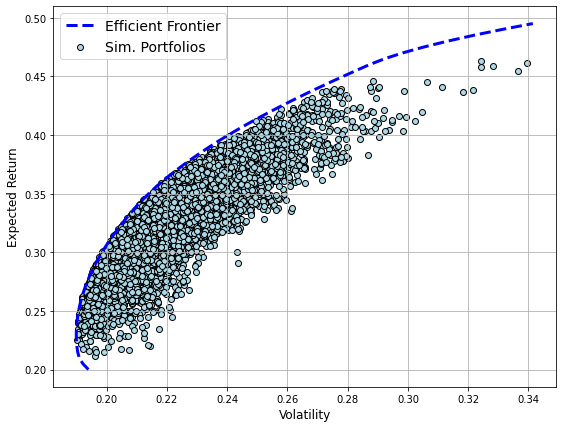

In [116]:
results = np.array(results)

plt.plot(results[:, 0], results[:, 1], linestyle="--", linewidth=3, label="Efficient Frontier")
plt.scatter(res[:, 1], res[:, 0], edgecolor='black', color='lightblue', label="Sim. Portfolios")
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
#plt.show()
plt.savefig("efficient_frontier.png")

### Criticisms to Markowitz Model

* The portfolio weights tend to be extremely sensitive to very small changes in the expected returns. For example, even a small increase in the expected return of just one asset can dramatically alter the optimal composition of the entire portfolio;
* the presence of heavy tails in the return distributions can result in significant errors in covariance estimates as well (return normality assumption).

### Portfolios with a Risk-Free Asset
* When one of the asset of the portfolio is risk free, then the efficient frontier has a particularly simple form: the *capital allocation line* (CAL). 

* The simplest example is a portfolio containing two assets: one risk-free with $\mathbb{E}[R_f] = 3\%$ (e.g. treasury bill) and one risky (e.g. a stock) with $\mathbb{E}[R_r] = 10\%$ and standard deviation $\sigma_r = 20\%$.
  * The question that needs to be answered for any individual investor is how much to invest in each of these assets

$$\mathbb{E}[R_p] = \mathbb{E}[R_f]\cdot w_f + \mathbb{E}[R_r] \cdot ( 1 − w_f )$$
where $w_f$ is the relative allocation to the risk-free asset.

$$\sigma_p = ( 1 − w_f ) \cdot \sigma_r$$

* If $w_f = 1$ the expected return would be 3% and the risk of the portfolio would be 0%. 
* If $w_f = 0$ would give an investor an expected return of 10% and a portfolio risk of 20%. 
* If $w_f=0.25$:

$$\mathbb{E}[R_p] = ( 3\% \cdot 25\% ) + ( 10\% \cdot 75\% ) = 0.75\% + 7.5\% = 8.25\%$$

$$\sigma_p = 75\%\cdot 20\% = 15\%$$

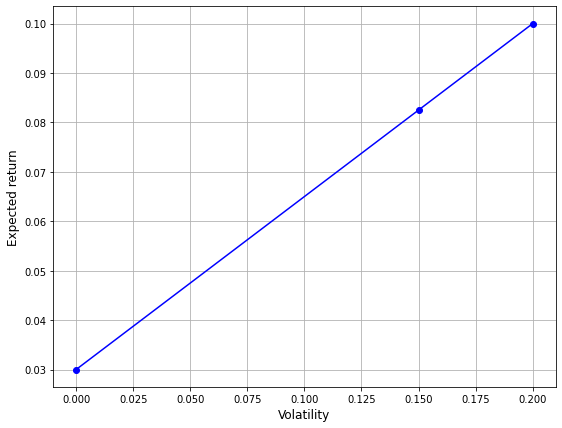

In [ ]:
x = [0, 0.15, 0.20]
y = [0.03, 0.0825, 0.1]
plt.plot(x, y, marker='o')
plt.xlabel("Volatility")
plt.ylabel("Expected return")
plt.grid(True)
plt.savefig("")

* **The slope of this line measures the trade off between risk and return: a higher slope means that investors receive a higher expected return in exchange for taking on more risk**. 

In [118]:
# CAL for the example
# last asset risk-free
import numpy as np

num_assets = 6
    
def min_risk(w, cov, n_risk_free=0):
  if n_risk_free == 0:
    return w.T.dot(cov.dot(w))
  else:
    return w[:-n_risk_free].T.dot(cov.dot(w[:-n_risk_free]))

def target_return(w, returns, target_return, risk_free_returns=[]):
  n_risk_free = len(risk_free_returns)
  if n_risk_free == 0: 
    portfolio_return = returns.dot(w)
    return (portfolio_return - target_return)
  else: 
    portfolio_return = returns.dot(w[:-n_risk_free]) + np.array(risk_free_returns).dot(w[-n_risk_free:]) 
    return (portfolio_return - target_return)

rf_asset_return = [0.10]
results_rf = []
bounds = [(0, 1) for asset in range(num_assets)]

for target in np.arange(0.10, 0.45, 0.01):
    constraints = ({'type': 'eq', 'fun': target_return, "args":(returns, target, rf_asset_return)},
                    {'type': 'eq', 'fun': sum_weights})
    weights = [1./num_assets for _ in range(num_assets)]
    opts = minimize(min_risk, weights, args=(covariance, 1),
                    bounds=bounds, constraints=constraints)
    
    results_rf.append((np.sqrt(min_risk(opts.x, covariance, 1)), target))

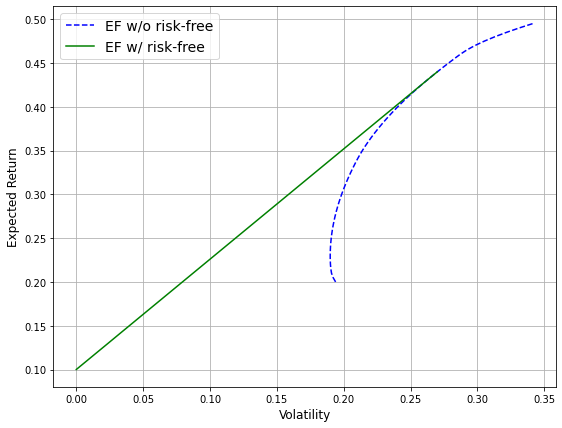

In [121]:
results_rf = np.array(results_rf)

plt.plot(results[:, 0], results[:, 1], linestyle="--", label='EF w/o risk-free')
plt.plot(results_rf[:, 0], results_rf[:, 1], label='EF w/ risk-free')
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.savefig("cal.png")

* **The efficient frontier has become a straight line, tangent to the
frontier of the risky assets only.** 

* When the target is 10% the entire investment is allocated to the
risk-free asset, as the target increases the fraction of the risky assets grows proportionally to the volatility.


### The Sharpe Ratio
* The goal of an investor is to find the portfolio that generates the steepest possible line when combined with a risk-free investment. 
  * **The slope of this line is called the Sharpe ratio of the portfolio;**
  * steepest line means highest return assuming the same level of risk.

* The Sharpe ratio is defined as:

$$\mathcal{S} = (R_p - r_0) / \sigma_p $$
  * with $R_p$ portfolio expected return, $\sigma_p$ portfolio standard deviation in return (risk), and $r_0$ the return of the risk-free asset.

* **Sharpe ratio measures how much additional return we achieved for the additional risk we took on, relative to putting all our money in a risk-free asset**.

* Assume you want to achieve a certain level of return $R_\textrm{target}$ with your portfolio, what is the fraction $w_p$ of your wealth to place in the risky part of the portfolio ?

$$ ( 1 - w_p ) * r_0 + w_p * R_p = R_\textrm{target}\\[5pt]$$

$$ w_p = \cfrac{( R_\textrm{target} – r_0)}{( R_p – r_0)}\\[5pt]$$

* The corresponding risk is

$$ w_p\cdot \sigma_p = \left[\cfrac{( R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p $$

* So if you want to minimize the portfolio risk you need to find:

$$ \min\left\{\left[\cfrac{(R_\textrm{target} – r_0)}{(R_p – r_0)}\right]\cdot \sigma_p\right\} = \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\}\\[5pt]$$

* But $R_\textrm{target}$ and $r_0$ are fixed so minimizing the above ratio is equivalent to maximize the Sharpe ratio:

$$ \min\left\{\cfrac{( R_\textrm{target} – r_0)}{\mathcal{S}}\right\} \implies\max\left\{\mathcal{S}\right\}\\[5pt]$$

* **The risky portfolio that maximizes the Sharpe ratio is the one that minimize the variance at the same time**.

In [122]:
# Sharpe ratio optimization
num_assets = 5
rf_asset_return = 0.10

def sharpe_ratio(w, returns, rf_asset_return, cov): 
    p_ret = returns.dot(w)
    p_var = np.sqrt(w.T.dot(cov.dot(w)))
    ratio = -(p_ret - rf_asset_return) / p_var
    return ratio

constraints = ({'type': 'eq', 'fun': sum_weights})
bounds = tuple((0, 1) for asset in range(num_assets))
weights = [1./num_assets for _ in range(num_assets)]
opts = minimize(sharpe_ratio, weights, args=(returns, rf_asset_return, covariance),
                bounds=bounds, constraints=constraints)
print (opts)

     fun: -1.259317843917775
     jac: array([-0.37875983, -0.37936528, -0.26915939,  0.02855796, -0.37932488])
 message: 'Optimization terminated successfully'
    nfev: 36
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.19754346e-01, 5.43974190e-01, 5.20417043e-18, 1.22298005e-16,
       3.36271464e-01])


In [ ]:
print ("Sharpe ratio: ", -opts.fun)

Sharpe ratio:  1.259317843917775


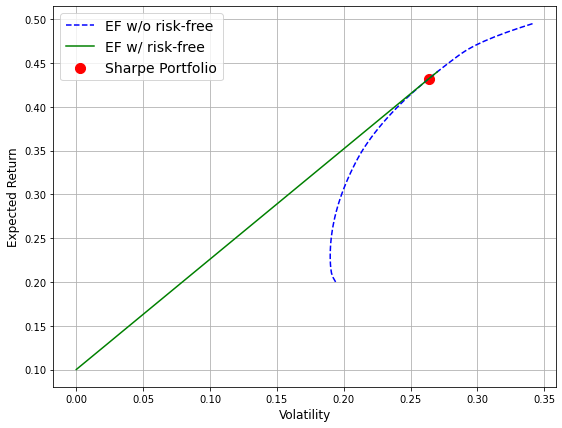

In [124]:
plt.plot(results[:, 0], results[:, 1], linestyle="--", label='EF w/o risk-free')
plt.plot(results_rf[:, 0], results_rf[:, 1], label='EF w/ risk-free')
plt.scatter([0.2636580157517128], [0.4320292439280858], marker='o', s=102, label = "Sharpe Portfolio", color='red', zorder=1)
plt.xlabel("Volatility")
plt.ylabel("Expected Return")
plt.grid(True)
plt.legend()
plt.savefig("sharpe_ratio.png")

* **The optimization using the Sharpe ratio gives a portfolio that is
on the minimum volatility efficient frontier, and gives the maximum
return relative to putting all our money in the risk-free asset**.

## Portfolio Diversification

* A security total risk can be divided into:
  * **unsystematic**, the risk portion peculiar to the company that can be diversified away;
  * **systematic**, the non-diversifiable portion that is related to the
movement of the stock market and is therefore unavoidable.

* **Diversification** is a common topic in portfolio construction and allows to combine risky stocks so that the resulting portfolio is less risky than the sum of its components. 
  * Unfortunately, perfect negative relationship between the returns is very rare in real world;
  * however diversification will always reduce risk;
  * empirical studies have demonstrated that risk can be virtually eliminated in portfolios of 30 to 40 randomly selected stocks. 

* When using the standard variation of the portfolio return as a measure of the risk, as in the Markowitz model, it is easy to show how diversification allows to reduce the risk (assume an equally weighted portfolio):

$$\sigma_P = \sqrt{0.5\sigma_1^2 + 0.5\sigma_2^2 + 2 \cdot 0.5\sigma_1 \cdot 0.5\sigma_2\cdot\rho_{12}} \lt  0.5\sigma_1 + 0.5\sigma_2$$

* The inequality holds unless $\rho_{12} = 1$, so in general, **for risk, the whole is less than the sum of its parts**. 


## Linear Models

* **Linear models** can be used whenever a *target variable* ($y$) can be described with a linear combination of one or more *independent variables* ($X$)

$$y = \beta_1 X_1 + \beta_2 X_2 + \ldots + \alpha$$

* In such models it is mandatory to avoid **collinearity** among the independent variables, which means each $X_i$ cannot be expressed as a linear combination of other $X_j$
  * i.e. they really must be independent !

* A model before becoming useful needs to be **calibrated**
  * need to find the model parameter values such that it explains at its best real data.
* Calibration of a linear model can be done with a **linear regression** using *ordinary least squares* (OLS) techinique.
  * OLS algorithm determine the model parameters such that the following is minimized

$$ \min_{\beta,\alpha}\sum_i (y_i - \tilde{y}_i)^2$$
where $\tilde{y}$ is the $y$ value predicted by the model.

<center>

![](https://drive.google.com/uc?id=1gy8nApIAucDZB17TFDZ5gFkgfKtACYgJ)

</center>

## Linear Models

* Chinese Yuan (CNY) was pegged to the US Dollar (USD) prior to July 2005. 
* Then, China announced that the exchange rate would be set with reference to a basket of other currencies, allowing for a movement of up to 0.3\% within any given day. 
  * The actual currencies and their basket weights are unannounced by China. 

1. For any given period, what is the implicit reference basket for the Chinese currency ?
2. Has the reference basket changed over time ?
3. Has the Chinese currency depreciated with respect to the dollar? If so, how much and when?

* We can assume that Yuan exchange was determined from a linear relationship with the currencies in the reference basket:

$$CNY = \beta_{EUR}EUR + \beta_{GBP} GBP + \ldots + \beta_{CND}CND + \alpha$$

* Consider the dataset [exchange_rates.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/exchange_rates.csv) containing daily currencies exchange rates in the 1999 to 2013 period.

* To apply this methodology the original dollar-based exchange rates have been converted using the Swiss Franc. This allows currency moves of the dollar to be be used to explain moves in the Yuan. 
  * The choice of Swiss Franc is consistent with evaluations with respect to a stable currency.


In [ ]:
import pandas as pd

data = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/exchange_rates.csv", index_col="DATE")
print (data.head())


            DEXCHUS  DEXJPUS  DEXKOUS  DEXMAUS  DEXUSEU  DEXUSUK  DEXTHUS  \
DATE                                                                        
1999-01-05   8.2795   111.15   1166.0      3.8   1.1760   1.6566    36.18   
1999-01-06   8.2795   112.78   1160.0      3.8   1.1636   1.6547    36.50   
1999-01-07   8.2798   111.69   1151.0      3.8   1.1672   1.6495    36.30   
1999-01-08   8.2796   111.52   1174.0      3.8   1.1554   1.6405    36.45   
1999-01-11   8.2797   108.83   1175.0      3.8   1.1534   1.6375    36.28   

            DEXSZUS   CNY_SFR    YEN_SFR  ...    JPY_SFR  ret_USD_SFR  \
DATE                                      ...                           
1999-01-05   1.3694  6.046079  81.166934  ...  81.166934    -0.002045   
1999-01-06   1.3852  5.977115  81.417846  ...  81.417846    -0.011406   
1999-01-07   1.3863  5.972589  80.566977  ...  80.566977    -0.000793   
1999-01-08   1.3970  5.926700  79.828203  ...  79.828203    -0.007659   
1999-01-11   1.3963  5

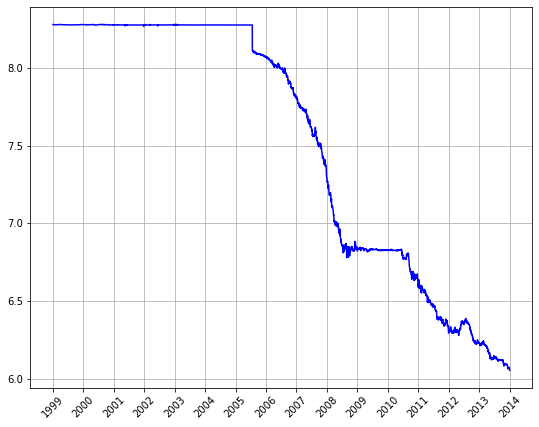

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator, DateFormatter

plt.plot(pd.to_datetime(data.index), data["DEXCHUS"])
plt.gca().xaxis.set_major_formatter(DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(YearLocator())
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [ ]:
import statsmodels.api as sm

X = data.loc[data.index < '2005-06-30' ,
          ['ret_YEN_SFR', 'ret_EUR_SFR', 
           'ret_GBP_SFR', 'ret_USD_SFR']]
y = data.loc[data.index < '2005-06-30' ,'ret_CNY_SFR']
X = sm.add_constant(X)

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:            ret_CNY_SFR   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.647e+06
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:34:46   Log-Likelihood:                 13749.
No. Observations:                1692   AIC:                        -2.749e+04
Df Residuals:                    1687   BIC:                        -2.746e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.921e-07   1.74e-06     -0.110      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* From the detailed summary the most important information is:
  * **R-squared**: the closer to 1 the higher is the linear correlation between $y$ and $X$;
  
  * the 6 columns beside the parameter names:
    * coeff — The estimate of this model parameter (the weight assigned to this feature);
    * std err — The standard error of our estimate.

* From these two values we can compute the t-score of our estimate (third column):
$$ t = \frac{\textrm{coeff}}{\textrm{std err}}$$
  * It tells how small the error is with respect to the estimated value: **the larger the $t$-score, the smaller the error and the more confident we can be in our estimate**.
  * To better quantify our confidence, it’s usual to compute the associated $p$-value: 
    * we expect the $t$-score to follow a standard distribution and **the probability of obtaining results at least as extreme as the value observed is simply the area under the curve to the right of the $t$-score value** ($p$-value, the fourth column).


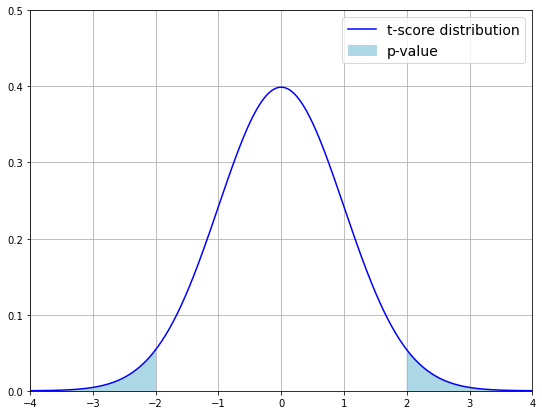

In [ ]:
from scipy.stats import norm

x = np.arange(-4, 4, 0.01)
x1 = np.arange(-4, -2, 0.01)
x2 = np.arange(2, 4, 0.01)

plt.plot(x, norm.pdf(x), label='t-score distribution')
plt.fill_between(x1, norm.pdf(x1), 0, color='lightblue')
plt.fill_between(x2, norm.pdf(x2), 0, color='lightblue', label='p-value')
plt.xlim(-4, 4)
plt.ylim(0, 0.5)
plt.grid(True)
plt.legend()
plt.show()

* The smaller the $p$-value, the stronger the evidence that the value we’re estimating is different than zero.
  * Typical thresholds for the $p$-value are:
    * $p<0.05$ — Moderate evidence
    * $p<0.01$ — Strong evidence
    * $p<0.001$ — Very strong evidence

* **In our example R-squared is 1, and the only largely significant predictor is USD ($p$-value 0) confirming that indeed CNY was anchored to US dollar prior July 2005.**

* Second, we fit the regression model for the first six months following the announcement of the change in currency policy.

In [ ]:
X = data.loc[(data.index > '2005-07-01') & (data.index < '2005-12-31'), 
             ['ret_YEN_SFR', 'ret_EUR_SFR', 'ret_GBP_SFR', 'ret_USD_SFR',
              'ret_WON_SFR', 'ret_MYR_SFR', 'ret_THB_SFR']]
y = data.loc[(data.index > '2005-07-01') & (data.index < '2005-12-31'), 
             'ret_CNY_SFR']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
print(est.summary())


                            OLS Regression Results                            
Dep. Variable:            ret_CNY_SFR   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     326.3
Date:                Thu, 17 Nov 2022   Prob (F-statistic):           8.41e-76
Time:                        09:35:02   Log-Likelihood:                 667.58
No. Observations:                 130   AIC:                            -1319.
Df Residuals:                     122   BIC:                            -1296.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0001      0.000     -0.920      

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* R-squared is quite close to 1 so there is some correlation between $y$ and $X$.
* During this six-month period, there is evidence of the Yuan departing from a US Dollar peg. 
  * The exchange rates with statistically significant regression parameters (lowest $p$-values) are the Korean Won (WON) and the Malaysian Ringgit (MYR).

* To examine for further changes in the implicit reference basket, one could fit the same model for other periods from 2006 through 2013.

* Finally it is possible to measure the annualized trend in the Yuan exchange rate relative to the other currencies in the studied period. 
  * The annualization is performed on the $\alpha$ coefficient which is the only one not related to other currency variations (i.e. the idiosyncratic part of the rate variation).

In [ ]:
import numpy as np

print ("{:.4f}".format((1+est.params[0])**(252/2)-1))

-0.0150


+ **So the Yuan depreciated in the studied period.**


## Capital Asset Pricing Model

* The Capital Asset Pricing Model (CAPM) describes the relationship between expected return of assets and **systematic risk** of the market.
  * No measure of unsystematic risk appears in the risk premium for in the world of CAPM diversification has already eliminated it.
  
* In such a model, it is assumed a linear relationship between the expected return of any security (or portfolio) and the expected return of the *market
portfolio*. It is given by

$$r_i = r_f + \beta_i(r_m-r_f)$$
where:
  * $r_i$ is the expected return of the $i^{th}$ security;
  * $r_f$ is the risk-free rate with zero standard deviation (e.g. Treasury Bills rates);
  * $r_m - r_f$ is the risk premium ($r_m$ denotes the market return including all securities in the market, e.g. an index like S\&P 500);
  * $\beta_i$ is a measure of $i^{th}$ asset volatility in relation to the overall market. 

* The relationship between risk and expected return is called the security market line (SML).
  * (Undervalued) No security can sell for long at prices low enough to yield more than its appropriate return on the SML; 
    * the security would then be very attractive compared with other securities of similar risk, and investors would bid its price up until its expected return fell to the appropriate position on the SML.
  * (Overvalued) Conversely, investors would sell off any stock selling at a price high enough to put its expected return below its appropriate position. 
    * The resulting reduction in price would continue until the stock’s expected return rose to the level justified by its systematic risk.

<center>

![](https://drive.google.com/uc?id=1jqdqKl1tkdyKS2D4hrPbaXRR4hDW-lF2)

</center>

* CAPM $\beta$ can be estimated with the measurement of the slope of the *regression line*, of the market vs individual stock return distribution.



### Regression in CAPM

* The regressed coefficient estimates can be expressed as

$$\beta \approx \cfrac{\textrm{cov}(X,y)}{\textrm {var}(X)}$$

* so provides insights about how *volatile*, or how risky, a stock is relative to the rest of the market.

* CAPM $\beta$ calculation helps investors understand whether a stock moves in the same direction as the rest of the market.
  * If $\beta= 1.0$ stock price is perfectly correlated with the market;
  * if $\beta < 1.0$ ("defensive"), the security is theoretically less volatile than the market (i.e. provides lower returns, so it is less risky);
  * if $\beta > 1.0$, ("aggressive"), the assets price is more volatile than the market.

* The point is to find stocks that have high $\beta$, and portfolios that have high $\alpha$. 
  * High $\beta$ values mean that the stock fares better than index;
  * $\alpha$ values above zero mean that your portfolio gives positive return no matter what the market does.

* Input data on [capm.csv](https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv)

In [ ]:
# load capm file
import pandas as pd

capm = pd.read_csv("https://raw.githubusercontent.com/matteosan1/finance_course/develop/libro/input_files/capm.csv", 
                   index_col='Date')
capm.dropna(inplace=True)
print (capm.head())

                AAPL      AMZN         BA      Brent          GE        IBM  \
Date                                                                          
2000-08-24  0.854083  1.968750  34.960697  31.629999  250.664230  69.156509   
2000-08-25  0.864786  1.996875  35.286694  32.049999  251.993408  71.476715   
2000-08-28  0.883812  1.956250  34.716217  32.869999  255.183167  72.861946   
2000-08-29  0.900937  1.981250  34.105030  32.720001  254.651474  73.623802   
2000-08-30  0.905694  2.146875  34.227276  33.400002  244.550583  72.203979   

                  MGM        XOM        SP500        rf  ret_AAPL  ret_AMZN  \
Date                                                                          
2000-08-24  15.828620  20.596405  1508.310059  0.000242  0.032842  0.014251   
2000-08-25  15.858040  20.596405  1506.449951  0.000242  0.012289  0.014043   
2000-08-28  15.740352  20.565374  1514.089966  0.000243  0.021759 -0.020588   
2000-08-29  15.858040  20.491631  1509.839966  0.00

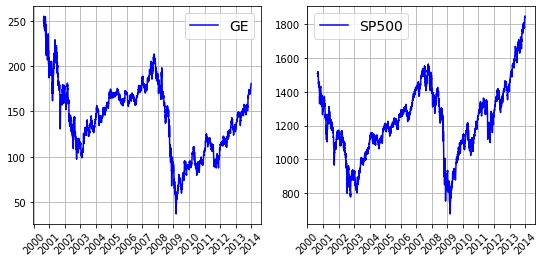

In [ ]:
from matplotlib.dates import YearLocator, DateFormatter

fig, ax = plt.subplots(1, 2, figsize=(9, 4))
ax[0].plot(pd.to_datetime(capm.index), capm['GE'], label='GE')
ax[0].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[0].xaxis.set_major_locator(YearLocator())
ax[0].tick_params('x', labelrotation=45)
ax[0].legend()
ax[0].grid(True)
ax[1].plot(pd.to_datetime(capm.index), capm['SP500'], label='SP500')
ax[1].xaxis.set_major_formatter(DateFormatter('%Y'))
ax[1].xaxis.set_major_locator(YearLocator())
ax[1].tick_params('x', labelrotation=45)
ax[1].legend()
ax[1].grid(True)
fig.show()

In [ ]:
# CAPM on ret_GE vs ret_SP500
import statsmodels.api as sm

capm = capm.dropna()

y = capm['ret_GE']
X = sm.add_constant(capm['ret_SP500'])

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       0.572
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     4468.
Date:                Thu, 01 Dec 2022   Prob (F-statistic):               0.00
Time:                        11:29:00   Log-Likelihood:                 9655.9
No. Observations:                3340   AIC:                        -1.931e+04
Df Residuals:                    3338   BIC:                        -1.930e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4.397e-05      0.000     -0.189      0.8

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


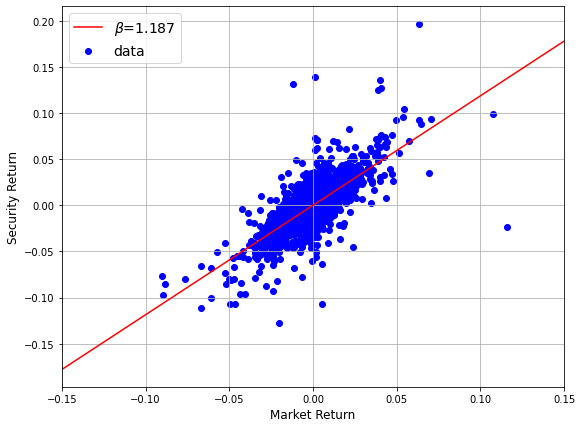

In [ ]:
x = np.arange(-0.15, 0.16, 0.01)

plt.scatter(capm['ret_SP500'], y, label='data')
plt.plot(x, x*est.params[1]+est.params[0], color='red', label=r'$\beta$={:.3f}'.format(est.params[1]))
plt.xlabel("Market Return")
plt.ylabel("Security Return")
plt.grid(True)
plt.xlim(-0.15, 0.15)
plt.legend()
plt.show()

* The whole model is about plotting a line in a scatter plot: not a very complex model. 

* Assumptions under the model are even more simplistic:
  * expect that all investors are rational and they avoid risk;
  * everyone have full information about the market;
  * everyone have similar investment horizons and expectations about future movements;
  * stocks are all correctly priced.

* Moreover, this is a model from the 1950s; market dynamics were different back then. And of course, this is a retrospective model. We cannot know how future stock prices move and how the market behaves.

## Multifactor Models

* In its original formulation CAPM treats the market return as the only factor.

* Nevertheless a stock’s return can depend also on other macro-economic factors, such commodity prices, interest rates, economic growth (GDP).

$$r_i = \alpha + \beta_1 f_1 + \beta_2 f_2 + \beta_3 f_3 + \ldots$$

* Consider to improve the CAPM model by adding the **crude oil price** as a second factor. 

In [ ]:
# CAPM of ret_GE vs ret_SP500 and ret_CL=F

y = capm['ret_GE']
X = sm.add_constant(capm[['ret_SP500', 'ret_Brent']])

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                 ret_GE   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     2250.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:38:54   Log-Likelihood:                 9662.9
No. Observations:                3340   AIC:                        -1.932e+04
Df Residuals:                    3337   BIC:                        -1.930e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.474e-05      0.000     -0.107      0.9

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* The regression coefficient for the oil factor (ret_CL=F) is statistically significant and negative; 
  * over the analysis period, price changes in GE stock are negatively related to the price changes in oil. 
  
* Let’s apply the same model now to Exxon (XOM) stock.

In [ ]:
# CAPM of ret_XOM vs ret_SP500 and ret_CL=F
y = capm['ret_XOM']
X = sm.add_constant(capm[['ret_SP500', 'ret_Brent']])

est = sm.OLS(y, X).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:                ret_XOM   R-squared:                       0.549
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     2031.
Date:                Thu, 17 Nov 2022   Prob (F-statistic):               0.00
Time:                        09:39:00   Log-Likelihood:                 10403.
No. Observations:                3340   AIC:                        -2.080e+04
Df Residuals:                    3337   BIC:                        -2.078e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0003      0.000      1.476      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


* The R-squared for XOM is slightly lower than for GE. 
  * Its relationship to the market index is less strong (lower t value). 
  * The regression coefficient for the oil factor (ret_Brent) is statistically significant and, unlike GE, positive.